## Introduction
In this notebook we show how to read a saved session from a checkpoint. This allows us to use an earlier trained model to compute the shape of the surface generated by the neural net. Typically this step is called prediction. For our particular case we don't do much predicting, since we know what the XNOR gate should output.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [2]:
def CreateLayer(X, width):
    W = tf.get_variable("W", [X.get_shape()[1].value, width], tf.float32)
    b = tf.get_variable("b", [width], tf.float32)
    return tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

In [3]:
def PlotValues(span, vals):
    fig = plt.figure(figsize=(10, 8))
    xv, yv = np.meshgrid(span, span)
    ax = fig.gca(projection='3d')
    cset = ax.contourf(xv, yv, vals, zdir='z', offset=span.min() - 0.3, cmap=cm.coolwarm)
    cset = ax.contourf(xv, yv, vals, zdir='x', offset=span.min() - 0.1, cmap=cm.coolwarm)
    cset = ax.contourf(xv, yv, vals, zdir='y', offset=span.max() + 0.1, cmap=cm.coolwarm)
    ax.plot_surface(xv, yv, vals, cmap=cm.coolwarm)

    ax.set_xlabel('x1')
    ax.set_xlim(span.min() - 0.1, span.max())
    ax.set_ylabel('y1')
    ax.set_ylim(span.min(), span.max() + 0.1)
    ax.set_zlabel('h')
    ax.set_zlim(span.min() - 0.3, span.max() + 0.1)

    plt.show()

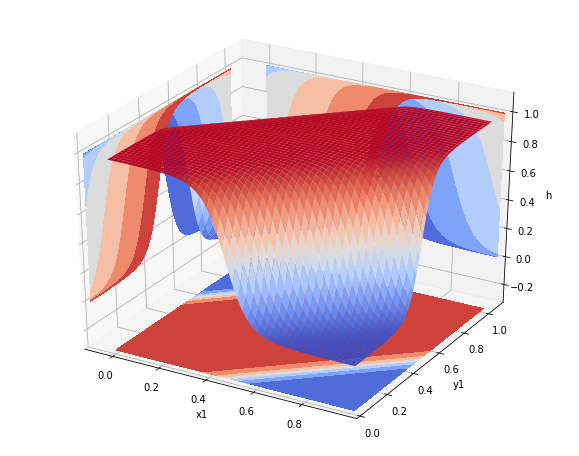

In [4]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 2], name="X")
with tf.variable_scope("layer1"):
    z0 = CreateLayer(X, 2)
with tf.variable_scope("layer2"):
    z1 = CreateLayer(z0, 1)
    
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, "/tmp/xnor.ckpt")

span = np.linspace(0, 1, 100)
x1, x2 = np.meshgrid(span, span)
X_in = np.column_stack([x1.flatten(), x2.flatten()])
xnor_vals = np.reshape(
    sess.run(z1, feed_dict={X: X_in}), x1.shape)
sess.close()
PlotValues(span, xnor_vals)

In [5]:
print " x1| x2| XNOR"
print "---+---+------"
print " 0 | 0 | %.3f" % xnor_vals[0][0]
print " 0 | 1 | %.3f" % xnor_vals[0][-1]
print " 1 | 0 | %.3f" % xnor_vals[-1][0]
print " 1 | 1 | %.3f" % xnor_vals[-1][-1]

 x1| x2| XNOR
---+---+------
 0 | 0 | 0.996
 0 | 1 | 0.005
 1 | 0 | 0.004
 1 | 1 | 0.997
